# Logistic Regression- Framingham Model
## The Framingham Risk Score is a gender-specific algorithm used to estimate the 10-year cardiovascular risk of an individual. The Framingham Risk Score was first developed based on data obtained from the Framingham Heart Study, to estimate the 10-year risk of developing coronary heart disease.

## Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv('Framingham.csv') #person survived or not
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4235 non-null   int64  
 1   age              4235 non-null   int64  
 2   education        4130 non-null   float64
 3   currentSmoker    4235 non-null   int64  
 4   cigsPerDay       4206 non-null   float64
 5   BPMeds           4182 non-null   float64
 6   prevalentStroke  4235 non-null   int64  
 7   prevalentHyp     4235 non-null   int64  
 8   diabetes         4235 non-null   int64  
 9   totChol          4185 non-null   float64
 10  sysBP            4235 non-null   float64
 11  diaBP            4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4234 non-null   float64
 14  glucose          3847 non-null   float64
 15  TenYearCHD       4235 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Missing data: Using the SimpleImputer class and SNS plot

In [4]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


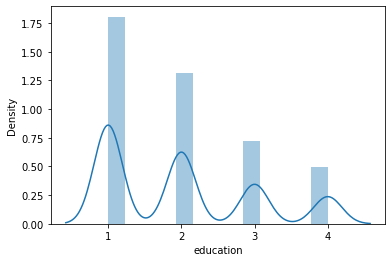

In [6]:
sns.distplot(dataset['education'])
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataset['education']=imputer.fit_transform(dataset[['education']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


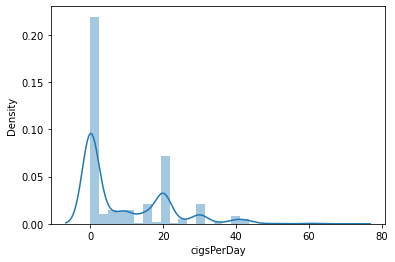

In [7]:
sns.distplot(dataset['cigsPerDay'])
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataset['cigsPerDay']=imputer.fit_transform(dataset[['cigsPerDay']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


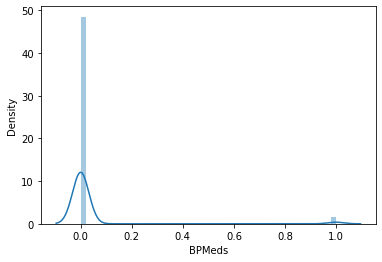

In [8]:
sns.distplot(dataset['BPMeds'])
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataset['BPMeds']=imputer.fit_transform(dataset[['BPMeds']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


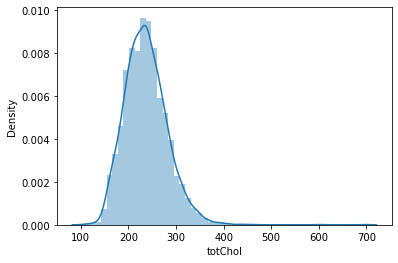

In [9]:
sns.distplot(dataset['totChol'])
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['totChol']=imputer.fit_transform(dataset[['totChol']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


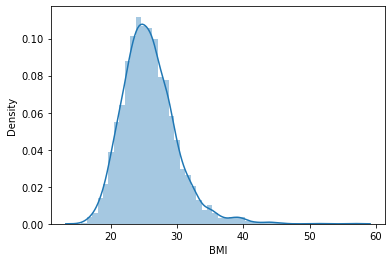

In [10]:
sns.distplot(dataset['BMI'])
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['BMI']=imputer.fit_transform(dataset[['BMI']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


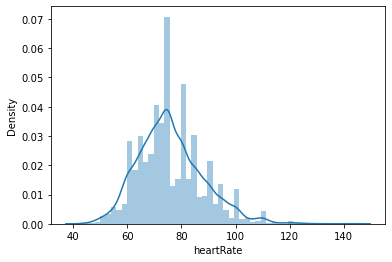

In [11]:
sns.distplot(dataset['heartRate'])
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['heartRate']=imputer.fit_transform(dataset[['heartRate']])

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


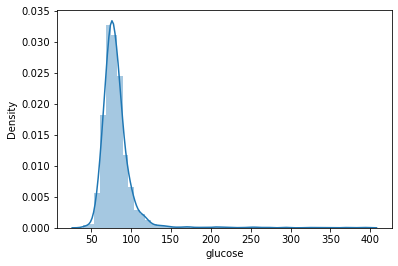

In [12]:
sns.distplot(dataset['glucose'])
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
dataset['glucose']=imputer.fit_transform(dataset[['glucose']])

In [13]:
dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Handling Categorical Variables

In [14]:
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
X=dataset[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
y=dataset[['TenYearCHD']]

In [22]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4235 non-null   int64  
 1   age              4235 non-null   int64  
 2   education        4235 non-null   float64
 3   currentSmoker    4235 non-null   int64  
 4   cigsPerDay       4235 non-null   float64
 5   BPMeds           4235 non-null   float64
 6   prevalentStroke  4235 non-null   int64  
 7   prevalentHyp     4235 non-null   int64  
 8   diabetes         4235 non-null   int64  
 9   totChol          4235 non-null   float64
 10  sysBP            4235 non-null   float64
 11  diaBP            4235 non-null   float64
 12  BMI              4235 non-null   float64
 13  heartRate        4235 non-null   float64
 14  glucose          4235 non-null   float64
 15  TenYearCHD       4235 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.5 KB


## Splitting in X and y

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10)

### Select best 10 features to train your model
The `SelectKBest` method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [25]:
from sklearn.feature_selection import SelectKBest, chi2

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

# Dataset display
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features from highest to lowest

           Specs       Score
10         sysBP  731.751473
14       glucose  389.791591
1            age  319.383383
9        totChol  230.183847
4     cigsPerDay  228.670446
11         diaBP  153.482942
7   prevalentHyp   92.481520
8       diabetes   39.177652
5         BPMeds   30.788601
0           male   19.158708


## Splitting the data into X and y with selected independent variables

In [26]:
X=dataset[['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'glucose']]
y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10)

## Feature Scaling

## Training the Logistic Regression model on the Training set

In [28]:
from sklearn.linear_model import LogisticRegression
#part of classification problem 
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/carmengascogalvez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Predicting a new result-Validation set
* Only select the variables you used for training

In [30]:
print(classifier.predict([[1, 48,10,0,1,0,232,138,90,72]]))

[0]


In [32]:
print(classifier.predict([[0, 46,20,0,0,0,291,112,78,89]]))

[0]


In [33]:
print(classifier.predict([[0, 38,5,0,0,0,195,122,84.5,78]]))

[0]


In [29]:
X.columns

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'glucose'],
      dtype='object')

In [35]:
print(classifier.predict([[1, 41, 0,0,0,0,195,139,88,65]]))

[0]


In [36]:
print(classifier.predict([[0,42,30,0,0,0,190,108,70.5,85]]))

[0]


## Predicting the Test set results

In [37]:
y_pred=classifier.predict(X_test)

## Confusion Matrix

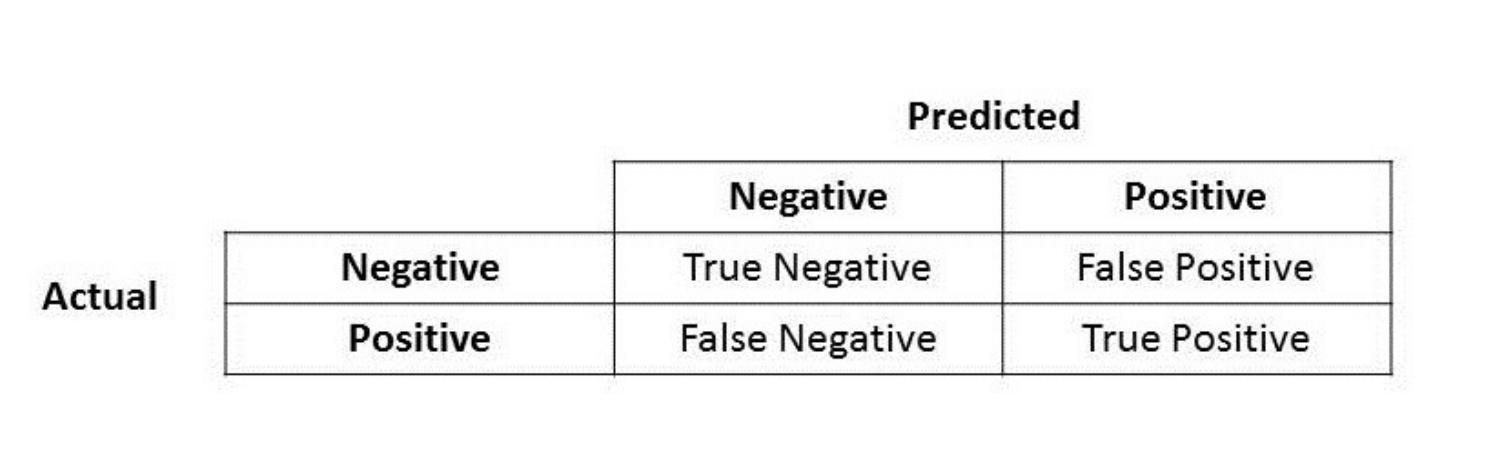

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay



In [39]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[711   9]
 [122   5]]


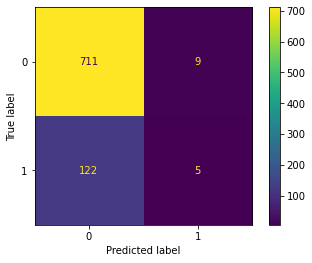

In [40]:
#heat map to see it better
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

## Comment on yout findings

In [41]:
# accuracy score
accuracy_score(y_test, y_pred)

0.8453364817001181

Based on the accuracy score we got, the data seems to be pretty accurate althought there are quite a few false negatives. 
It predicts there are alot of people without the disease when in reality, they do in fact have the disease.

# TN No disease predicted correctly (711)
# TP disease predicted correctly (5)
# FP actually no disease but predicted disease (9)
# FN actually disease but predicted no disease (122)